# CoCo Fits
___

## ./lcfit Visual inspection

In [3]:
# %matplotlib inline
%matplotlib inline

try:
    reload  # Python 2.7
except NameError:
    try:
        from importlib import reload  # Python 3.4+
    except ImportError:
        from imp import reload  # Python 3.0 - 3.3
       
from matplotlib import pyplot as plt
from matplotlib import rc
rc('text', usetex=True)

import os
import numpy as np
from astropy.table import Table

import pycoco as pcc

# reload(pcc) ## FOR DEV
# reload(pcc.defaults)
# reload(pcc.functions)

SN1993J


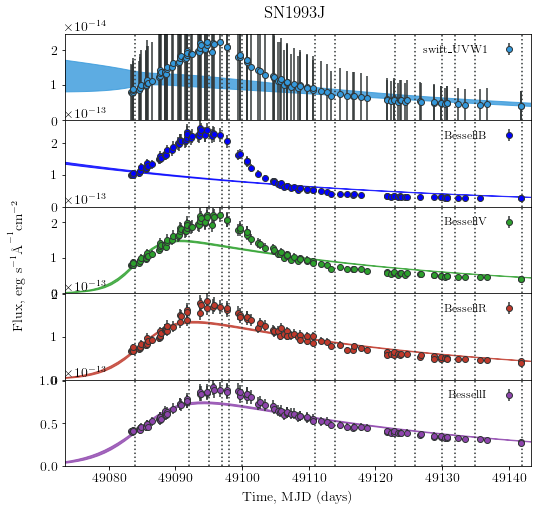

SN1994I


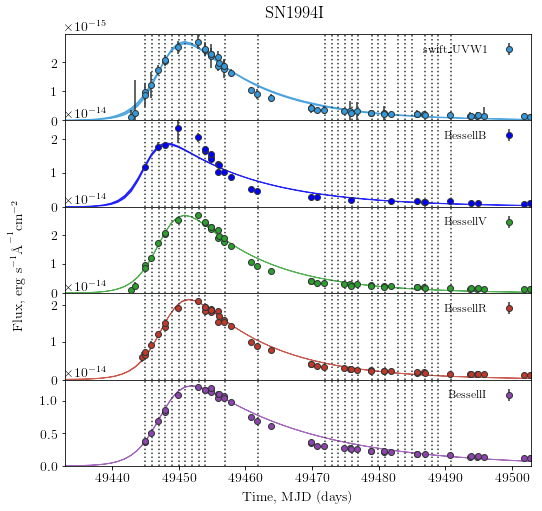

SN1996cb


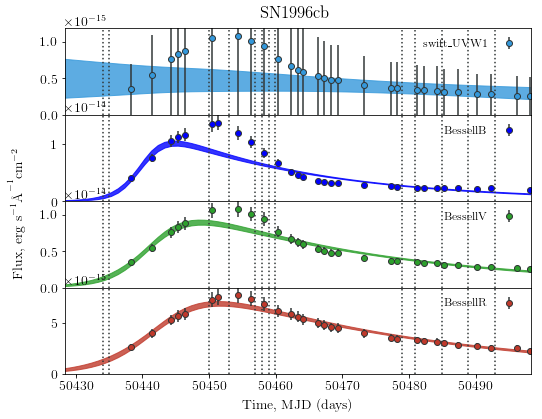

SN1998bw


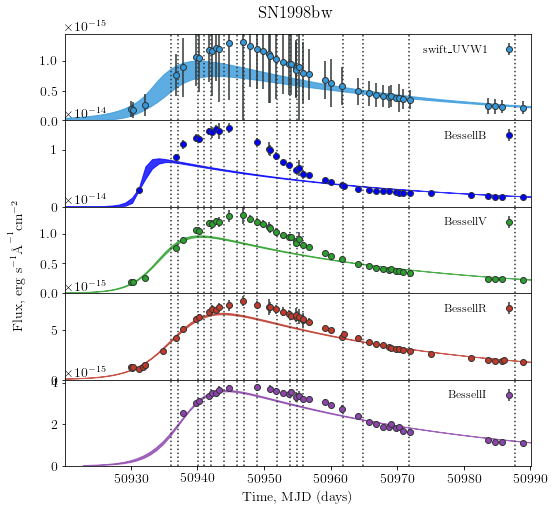

SN1999dn


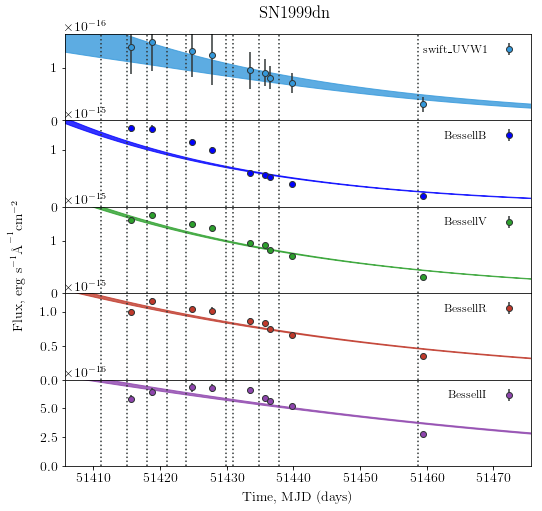

SN2002ap


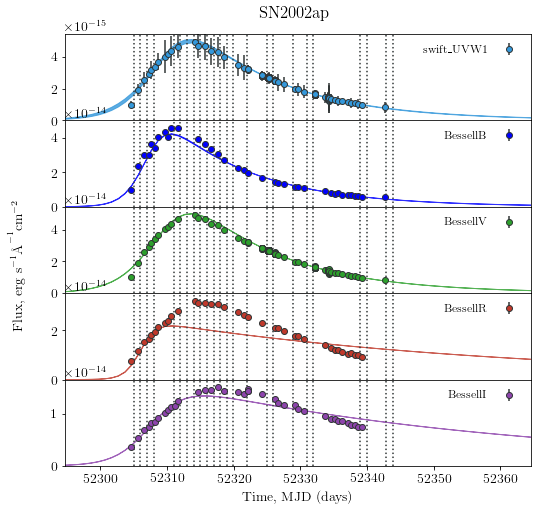

SN2003jd


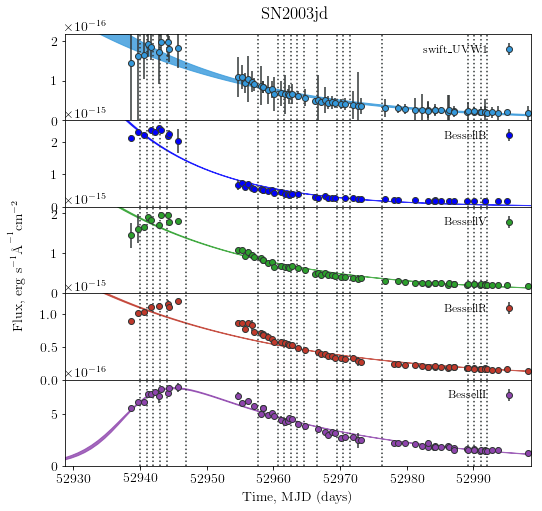

SN2004aw


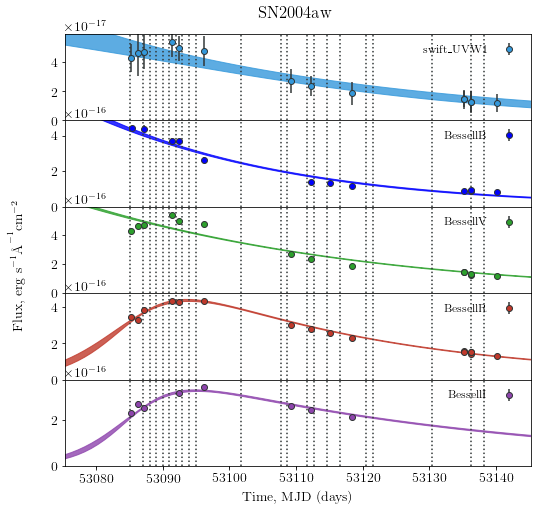

SN2005bf


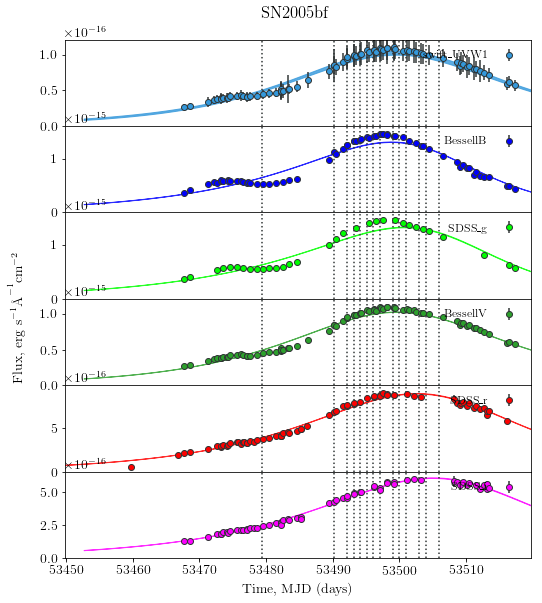

SN2005hg


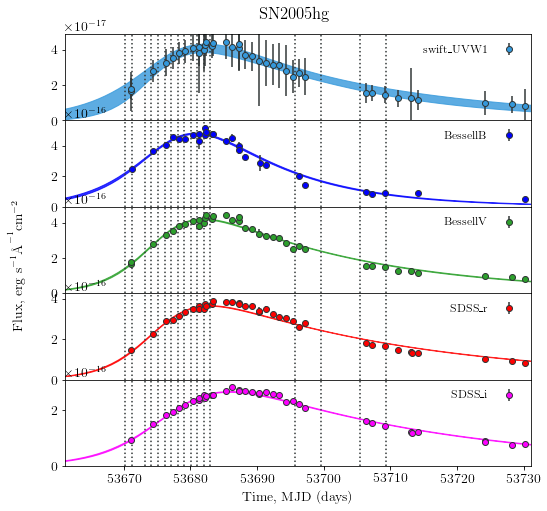

SN2006aj


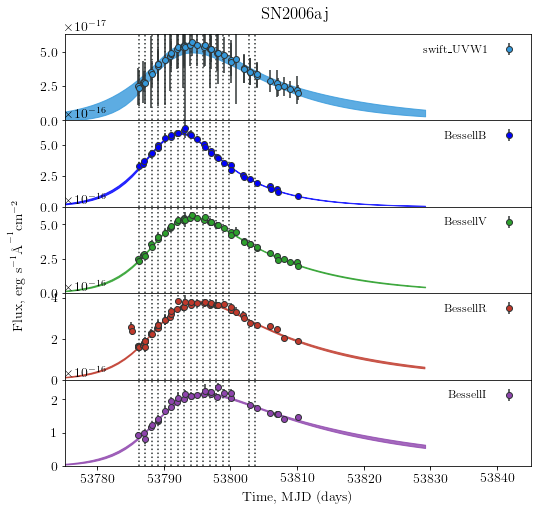

SN2007C


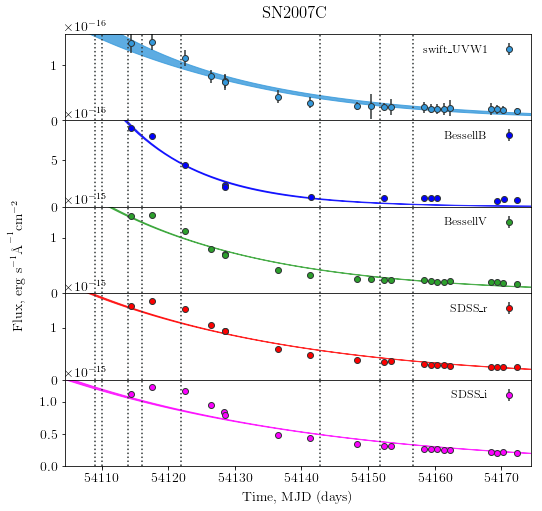

SN2007Y


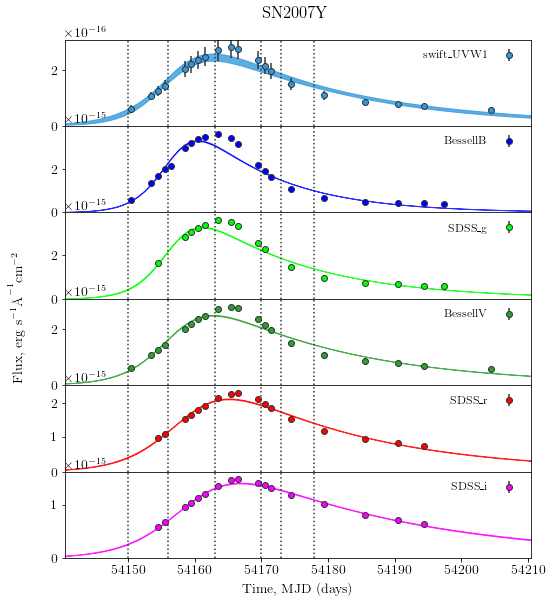

SN2007uy


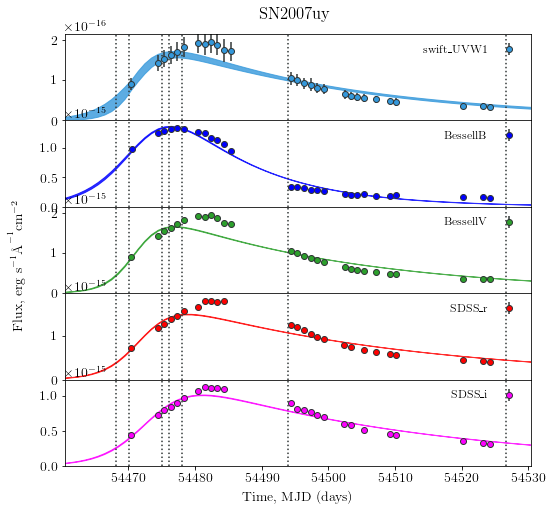

SN2007gr


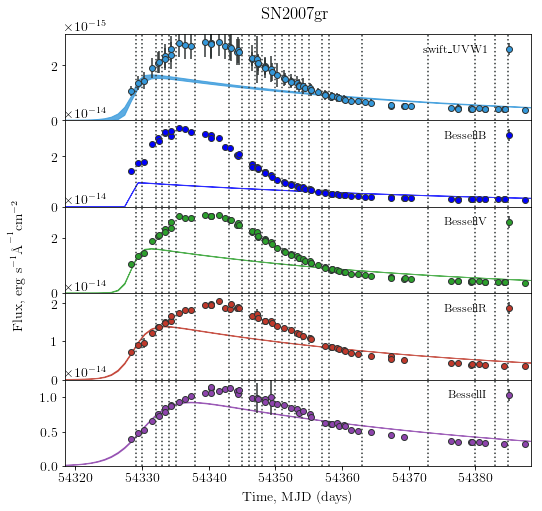

SN2008D


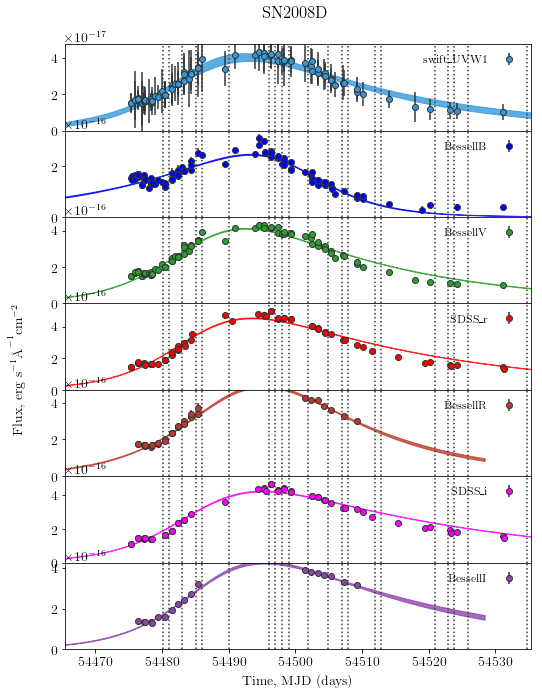

SN2008bo


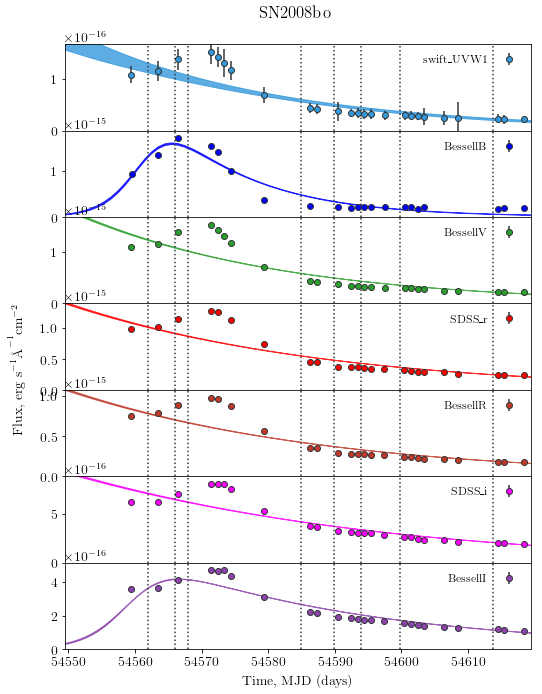

SN2008ax


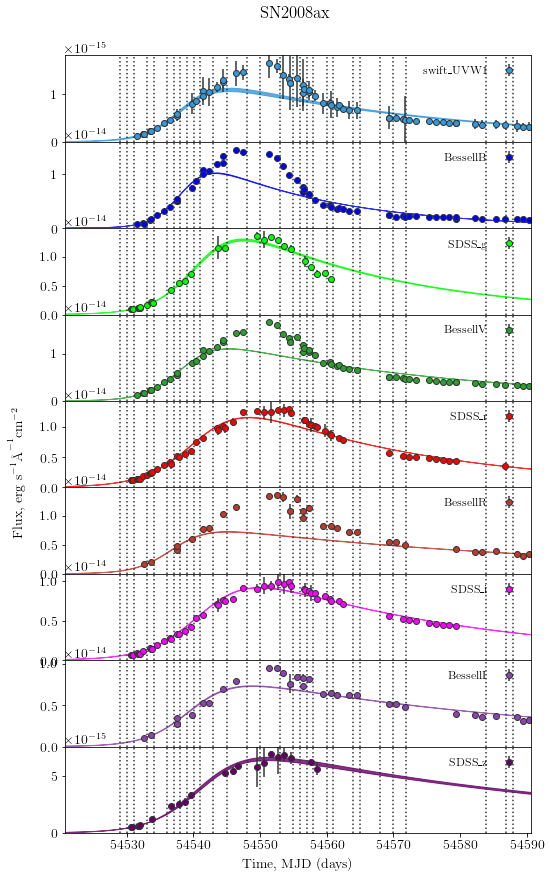

SN2009bb


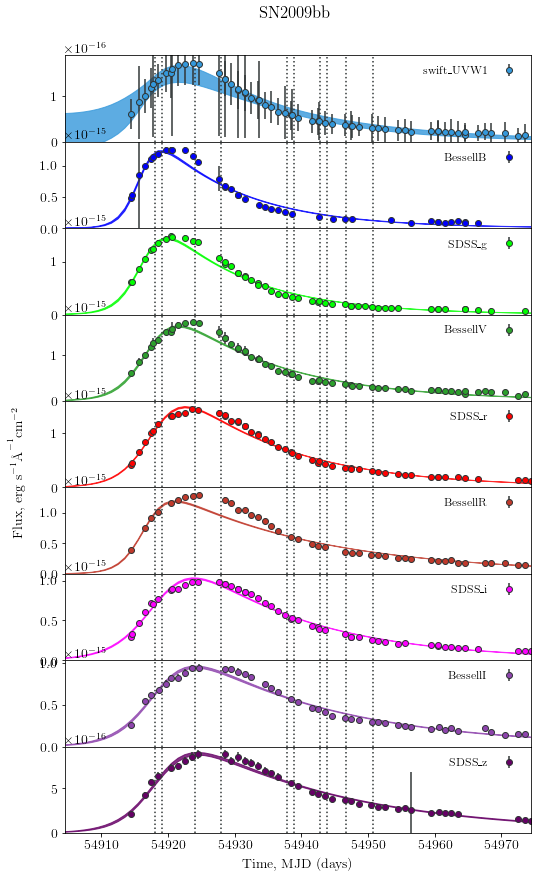

SN2009er


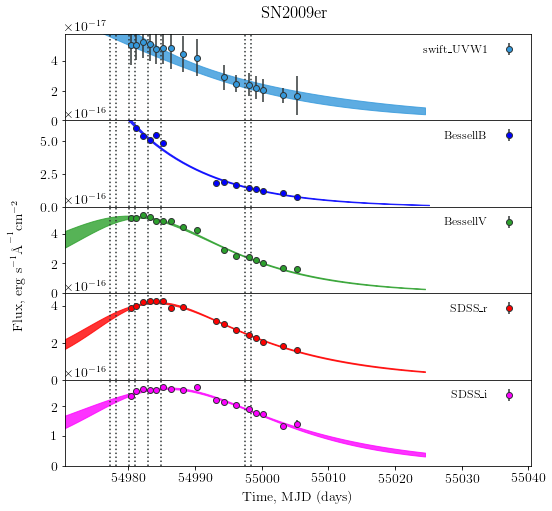

SN2009iz


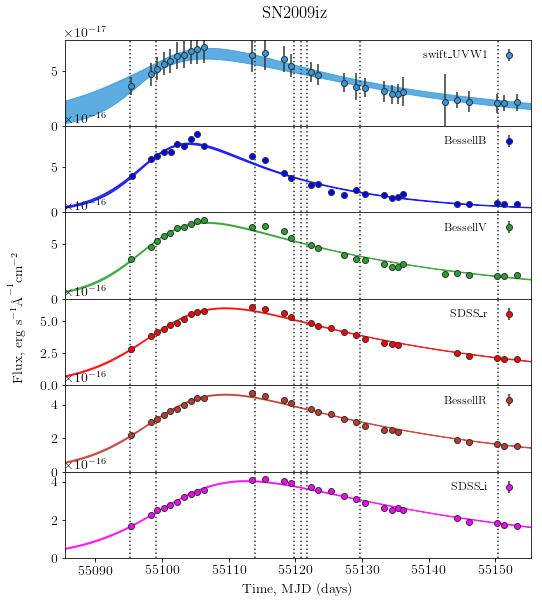

SN2009jf


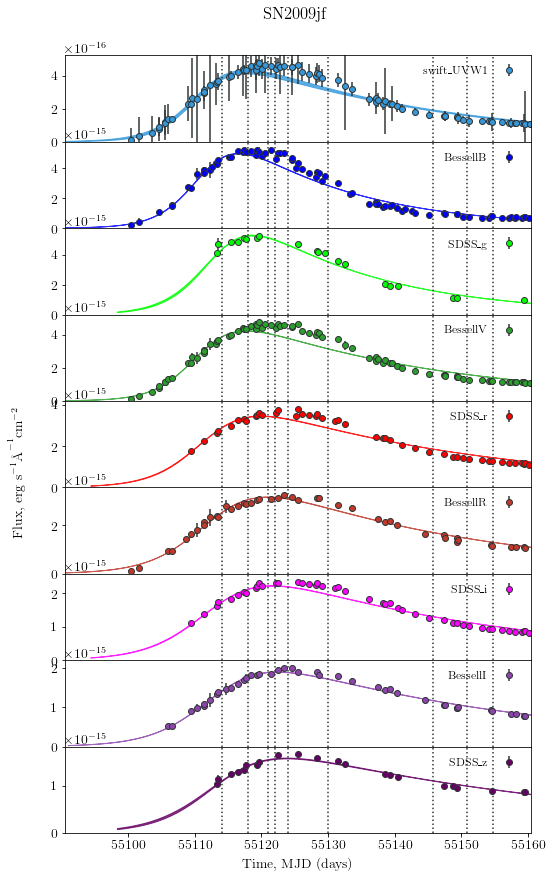

SN2010al


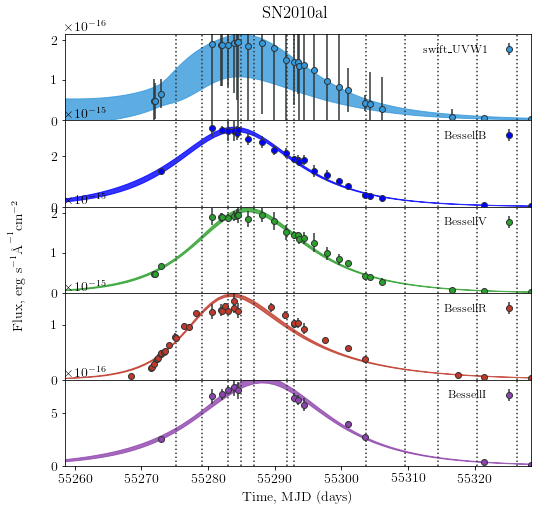

Exception: 

In [4]:
plot_out_dir = "/Users/szymon/Desktop/plots/CoCo-pycoco-debugging/"

sn_to_check = ["SN1993J",
"SN1994I",
"SN1996cb",
"SN1998bw",
"SN1999dn",
"SN2002ap",
"SN2003jd",
"SN2004aw",
"SN2005bf",
"SN2005hg",
"SN2006aj",
"SN2007C",
"SN2007Y",
"SN2007uy",
"SN2007gr",
"SN2008D",
"SN2008bo",
"SN2008ax",
"SN2009bb",
"SN2009er",
"SN2009iz",
"SN2009jf",
"SN2010al",
"SN2010as",
"SN2011bm",
"SN2011dh",
"SN2011ei",
"SN2011fu",
"SN2012ap",
"SN2013ge",
"iPTF13bvn"]

# sn_to_check = ["SN1998bw",]
# sn_to_check = ["SN2006aj",]
# sn_to_check = ["SN2007uy",]
# sn_to_check = ["SN2011dh",]
# sn_to_check = ["SN1994I",]
# sn_to_check = ["SN2002ap",]
# sn_to_check = ["SN2009jf",]
# sn_to_check = ["SN2015U",]


for snname in sn_to_check:
    sn = pcc.classes.SNClass(snname)
    sn.load_phot( path = os.path.join(pcc.defaults._default_data_dir_path, "lc/"+ snname + ".dat"))
    try:
        sn.load_list(os.path.join(pcc.defaults._default_list_dir_path, snname + ".list"))
    except:
        pass
    sn.load_spec()
    sn.get_lcfit(os.path.join(pcc.defaults._default_recon_dir_path, snname + ".dat"))
    sn.check_overlaps()
    print(sn.name)
#     sn.plot_lc()    
#     sn.plot_lc(xextent=60, savepdf=False, outpath=os.path.join(plot_out_dir, snname+"karpenka10"), showsnname=True)
    sn.plot_lc(xextent=60, savepdf=True, outpath=os.path.join(plot_out_dir, snname+"_default"), showsnname=True)
#     sn.plot_lc(xextent=60, savepdf=True, outpath=os.path.join(plot_out_dir, snname+"_bazin09"), showsnname=True)
#     sn.plot_lc(["SDSS_g"], xextent=60, savepdf=True, outpath=os.path.join(plot_out_dir, snname+"_kessler10"), showsnname=True, multiplot=False)

In [ ]:
plt.close("all")

## Look at the ones that didn't work
___


In [ ]:
save_bool = True
# refit = True
refit = False

sn_to_check = ["SN1993J", ## Catastrophic in B
"SN1994I", ## Driven by tail
"SN1996cb", ## Pretty Good
"SN1999dn", ## No Turnover
"SN2002ap", ## R?
"SN2003jd", ## No B/G Turnover - Driven By Tail
"SN2004aw", ## No B/G Turnover
"SN2005bf", ## Pre Emission
"SN2007C", ## No Turnover
"SN2007Y", ## Missed Peak
"SN2007uy", ## Missed Peak
"SN2007gr", ## Driven By Tail
"SN2008D",  ## Pre Preak Emission
"SN2008bo", ## Driven By Tail + Pre Peak Emission
"SN2008ax", ## Driven By Tail
"SN2009er", ## No B-Band Turnover
"SN2011dh", ## Driven By Tail
"SN2011fu", ## Two Peaks
"SN2013ge", ## BADå
"iPTF13bvn"] ## SDSS_R/I BAND

for snname in sn_to_check:
    sn = pcc.classes.SNClass(snname)
    sn.load_phot( path = os.path.join(pcc.defaults._default_data_dir_path, "lc/"+ snname + ".dat"))
    try:
        sn.load_list(os.path.join(pcc.defaults._default_list_dir_path, snname + ".list"))
    except:
        pass
    sn.load_spec()
    
    ## Run Fit
    if refit:
        pcc.coco.run_LCfit(os.path.join(pcc.defaults._default_data_dir_path, "lc/"+snname+".dat"), model="Karpenka12")
    
    sn.get_lcfit(os.path.join(pcc.defaults._default_recon_dir_path, snname + ".dat"))
    sn.check_overlaps()
    print(sn.name)
#     sn.plot_lc()    
#     sn.plot_lc(xextent=60, savepdf=False, outpath=os.path.join(plot_out_dir, snname+"karpenka10"), showsnname=True)
    sn.plot_lc(xextent=60, savepdf=save_bool, outpath=os.path.join(plot_out_dir, snname+"_karpenka"), showsnname=True)
#     sn.plot_lc(xextent=60, savepdf=True, outpath=os.path.join(plot_out_dir, snname+"_bazin09"), showsnname=True)
#     sn.plot_lc(["SDSS_g"], xextent=60, savepdf=True, outpath=os.path.join(plot_out_dir, snname+"_kessler10"), showsnname=True, multiplot=False)

In [ ]:
plt.close("all")

___


In [ ]:
save_bool = True
# refit = True
refit = False
sn_to_check = ["SN1999dn", ## No Turnover (in B)
"SN2004aw", ## No B Turnover
"SN2009er", ## No B-Band Turnover
"SN2011fu", ## Two Peaks
"SN2013ge", ## BADå

"iPTF13bvn"] ## SDSS_R/I BAND

for snname in sn_to_check:
    sn = pcc.classes.SNClass(snname)
    sn.load_phot( path = os.path.join(pcc.defaults._default_data_dir_path, "lc/"+ snname + ".dat"))
    try:
        sn.load_list(os.path.join(pcc.defaults._default_list_dir_path, snname + ".list"))
    except:
        pass
    sn.load_spec()
    ## Run Fit
    if refit:
        pcc.coco.run_LCfit(os.path.join(pcc.defaults._default_data_dir_path, "lc/"+snname+".dat"), model="Karpenka12")
    
    sn.get_lcfit(os.path.join(pcc.defaults._default_recon_dir_path, snname + ".dat"))
    sn.check_overlaps()
    print(sn.name)
#     sn.plot_lc()    
#     sn.plot_lc(xextent=60, savepdf=False, outpath=os.path.join(plot_out_dir, snname+"karpenka10"), showsnname=True)
    sn.plot_lc(xextent=60, savepdf=save_bool, outpath=os.path.join(plot_out_dir, snname+"_karpenka"), showsnname=True)
#     sn.plot_lc(xextent=60, savepdf=True, outpath=os.path.join(plot_out_dir, snname+"_bazin09"), showsnname=True)
#     sn.plot_lc(["SDSS_g"], xextent=60, savepdf=True, outpath=os.path.join(plot_out_dir, snname+"_kessler10"), showsnname=True, multiplot=False)

In [ ]:
pcc.utils.get_max_info(sn, "BessellB")

In [ ]:
plt.scatter(sn.phot.data["BessellB"]["MJD"], sn.phot.data["BessellB"]["flux"] - sn.lcfit.spline["BessellB"](sn.phot.data["BessellB"]["MJD"]))

In [ ]:
sn = pcc.classes.SNClass("SN2008D")
sn.load_phot( path = os.path.join(pcc.defaults._default_data_dir_path, "lc/SN2008D.dat"))
sn.plot_lc()

In [ ]:
sn = pcc.classes.SNClass("SN2006aj")
sn.load_phot( path = os.path.join(pcc.defaults._default_data_dir_path,"lc/SN2006aj.dat"))
sn.load_list(os.path.join(pcc.defaults._default_list_dir_path, "SN2006aj.list"))
sn.load_spec()
# sn.check_overlaps()

In [ ]:
sn.get_lcfit(os.path.join(pcc.defaults._default_recon_dir_path, "SN2006aj.dat"))
sn.plot_lc()

In [ ]:
sn.plot_spec()

In [ ]:
sn.load_mangledspec()
sn.plot_mangledspec()

In [ ]:
# snname = "SN1993J" ## POOR FIT IN B
# snname = "SN1994I" ## data/spec/SN1994I/1994I_6.69.txt is too short
# snname = "SN1996cb"## Good - best example of uncertainties
# snname = "SN1998bw"
# snname = "SN1999dn"## Poor fit in B - unconstrained rise
# snname = "SN2002ap"## Poor fit post-max in B
# snname = "SN2003jd"
# snname = "SN2004aw"## Poor fit in B - unconstrained rise
# snname = "SN2005bf"## Weirdo - not bad fit, but not great
snname = "SN2005hg"## Poor I-spectra
# snname = "SN2006aj"## Good even with bump in R
# snname = "SN2007C" ## Good - Sparse phot pre max
# snname = "SN2007Y"
# snname = "SN2007uy"## Perfect!
# snname = "SN2007gr"## Poor fit to B-band post-peak
# snname = "SN2008D" ## Early bump drives fit - poor around peak
# snname = "SN2008bo"
# snname = "SN2008ax"## Poor fit around peak
# snname = "SN2009bb"
# snname = "SN2009er"## poor fit - NO PRE-MAX BESSELLB
# snname = "SN2009iz"
# snname = "SN2009jf"
# snname = "SN2010al" 
# snname = "SN2010as"## NEED LIST FILE AND SPEC CALIBRATED
# snname = "SN2011bm"
# snname = "SN2011dh"## poor fit around peak
# snname = "SN2011ei"## B blows up
# snname = "SN2011fu" ## Huge pre-max burst missed in all bands, phot uncertainties too small
# snname = "SN2012ap"
# snname = "SN2013ge"## poor fit in B, r, i

sn = pcc.classes.SNClass(snname)
sn.load_phot( path = "/Users/berto/Code/CoCo/data/lc/" + snname + ".dat")
sn.load_list("/Users/berto/Code/CoCo/lists/" + snname + ".list")
# sn.load_spec()
sn.check_overlaps()
print(sn.name)

In [ ]:
sn.get_lcfit("/Users/berto/Code/CoCo/recon/" + snname + ".dat")
sn.plot_lc(xextent=60)

In [ ]:
# sn.plot_spec()

In [ ]:
# sn.load_mangledspec(verbose = True)

In [ ]:
# sn.plot_mangledspec()

In [ ]:
# for s in sn._mangledspeclist:
#     print(s)

In [ ]:
# sn.mangledspec["SN1994I_49457.990000.spec"].plot()

In [ ]:
# specobj.data.meta['comments']

In [ ]:
reload(pcc.classes)

In [ ]:
snname = "SN2011dh"## poor fit in B, r, i

sn = pcc.classes.SNClass(snname)
sn.load_phot( path = "/Users/berto/Code/CoCo/data/lc/" + snname + ".dat")
sn.load_list("/Users/berto/Code/CoCo/lists/" + snname + ".list")
sn.load_spec()
sn.check_overlaps()
print(sn.name)
sn.load_mangledspec(verbose = True)

In [ ]:
sn.mangledspec

In [ ]:
sn.plot_mangledspec(verbose=True)

In [ ]:
sn.mangledspec['SN2011dh_55778.930000.spec'].set_MJD_obs(

In [ ]:
snname = "SN2009er"## poor fit in B, r, i

sn = pcc.classes.SNClass(snname)
sn.load_phot( path = "/Users/berto/Code/CoCo/data/lc/" + snname + ".dat")
sn.load_list("/Users/berto/Code/CoCo/lists/" + snname + ".list")
sn.load_spec()
sn.check_overlaps()
print(sn.name)
sn.load_mangledspec()

In [ ]:
sn.plot_mangledspec()

In [ ]:

# filenamedat = "/Users/berto/data/DES/des_real_01250017_smp_data.dat"
